In [ ]:
import pandas as pd
df = pd.read_csv('helpdesk_customer_multi_lang_tickets.csv')
print("CSV file loaded successfully.")

CSV file loaded successfully.


In [ ]:
df.head()

,id,subject,body,answer,type,queue,priority,language,business_type,tag_1,tag_2,tag_3,tag_4,tag_5,tag_6,tag_7,tag_8,tag_9
0,1001352387736,Urgent: Critical impact on enterprise network ...,"Dear Customer Support Team, We are experiencin...",Subject: Re: Urgent: Critical impact on enterp...,Incident,Technical Support,high,en,IT Services,Service Outage,Network Issue,Urgent Issue,Technical Support,Problem Resolution,Critical Failure,System Crash,Service Disruption,NaN
1,1004699418379,Intermittent Cursor Freezing Issue on Dell XPS,"Dear Customer Support,<br><br>I hope this mess...","Dear <name>,\n\nThank you for reaching out reg...",Incident,Product Support,low,en,Tech Online Store,Technical Support,Product Support,Hardware Failure,Problem Resolution,Urgent Issue,Service Recovery,Documentation Request,NaN,NaN
2,1006966905046,Dringend: Unterstützung für die Datenwiederher...,"Hallo, wir haben severe Datenverluste in MySQL...","Hallo, vielen Dank, dass Sie uns kontaktiert h...",Incident,Technical Support,high,de,IT Services,Data Breach,Backup Restore,Technical Support,Urgent Issue,Software Bug,Problem Resolution,NaN,NaN,NaN
3,1009231330404,Anfrage zu den MacBook Air M1 Funktionen,"Sehr geehrtes Kundenserviceteam,\n\nich hoffe,...","Sehr geehrter <name>,\n\nvielen Dank für Ihre ...",Request,Sales and Pre-Sales,low,de,Tech Online Store,Customer Service,Product Support,Sales Inquiry,Technical Guidance,Warranty Claim,General Inquiry,NaN,NaN,NaN
4,1024440081041,Solicitação de Assistência com Erro de Instala...,"Caro Suporte ao Cliente,\n\nEstou enfrentando ...","Caro <name>,\n\nObrigado por entrar em contato...",Problem,Technical Support,medium,pt,IT Services,Technical Support,Software Bug,Urgent Issue,Problem Resolution,Product Support,NaN,NaN,NaN,NaN


In [ ]:
# prompt: Unique values count of each column

for col in df.columns:
  print(f"Column '{col}': {df[col].nunique()} unique values")


Column 'id': 1566 unique values
Column 'subject': 1565 unique values
Column 'body': 1565 unique values
Column 'answer': 1566 unique values
Column 'type': 4 unique values
Column 'queue': 10 unique values
Column 'priority': 3 unique values
Column 'language': 5 unique values
Column 'business_type': 5 unique values
Column 'tag_1': 25 unique values
Column 'tag_2': 38 unique values
Column 'tag_3': 54 unique values
Column 'tag_4': 63 unique values
Column 'tag_5': 62 unique values
Column 'tag_6': 56 unique values
Column 'tag_7': 42 unique values
Column 'tag_8': 31 unique values
Column 'tag_9': 0 unique values


In [ ]:
print(df['type'].unique())

['Incident' 'Request' 'Problem' 'Change']


In [ ]:
print(df['language'].unique())

['en' 'de' 'pt' 'es' 'fr']


In [ ]:
print(df['business_type'].unique())

['IT Services' 'Tech Online Store' 'IT Consulting Firm'
 'Software Development Company' 'IT Consulting Service']


In [ ]:
print(df['priority'].unique())

['high' 'low' 'medium']


In [ ]:
print(df['queue'].unique())

['Technical Support' 'Product Support' 'Sales and Pre-Sales'
 'Returns and Exchanges' 'IT Support' 'Billing and Payments'
 'Customer Service' 'Service Outages and Maintenance' 'Human Resources'
 'General Inquiry']


In [ ]:
df.shape

(1566, 18)

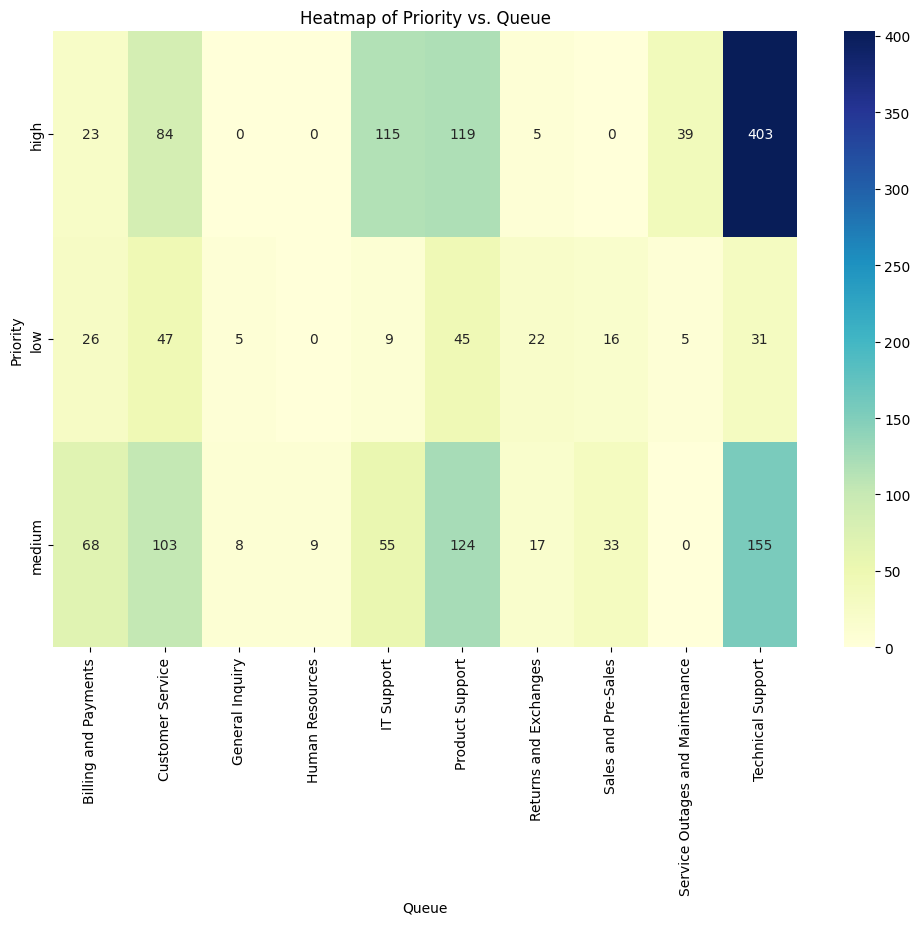

In [ ]:
# prompt: Analyse priority and queue and provide heatmap

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'priority' and 'queue' are columns in your DataFrame 'df'
priority_queue_counts = df.groupby(['priority', 'queue']).size().unstack(fill_value=0)

plt.figure(figsize=(12, 8))
sns.heatmap(priority_queue_counts, annot=True, fmt="d", cmap="YlGnBu")
plt.title('Heatmap of Priority vs. Queue')
plt.xlabel('Queue')
plt.ylabel('Priority')
plt.show()

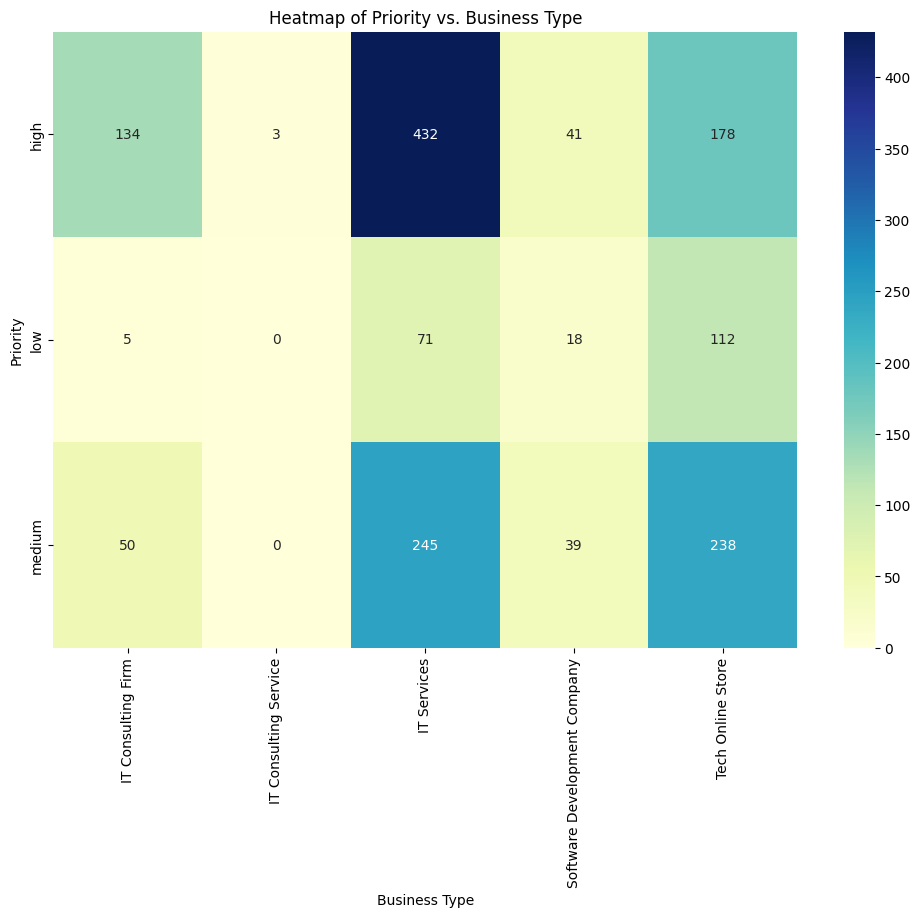

In [ ]:
# prompt: Analyse priority and business type and provide heatmap

# Assuming 'priority' and 'business_type' are columns in your DataFrame 'df'
priority_business_counts = df.groupby(['priority', 'business_type']).size().unstack(fill_value=0)

plt.figure(figsize=(12, 8))
sns.heatmap(priority_business_counts, annot=True, fmt="d", cmap="YlGnBu")
plt.title('Heatmap of Priority vs. Business Type')
plt.xlabel('Business Type')
plt.ylabel('Priority')
plt.show()

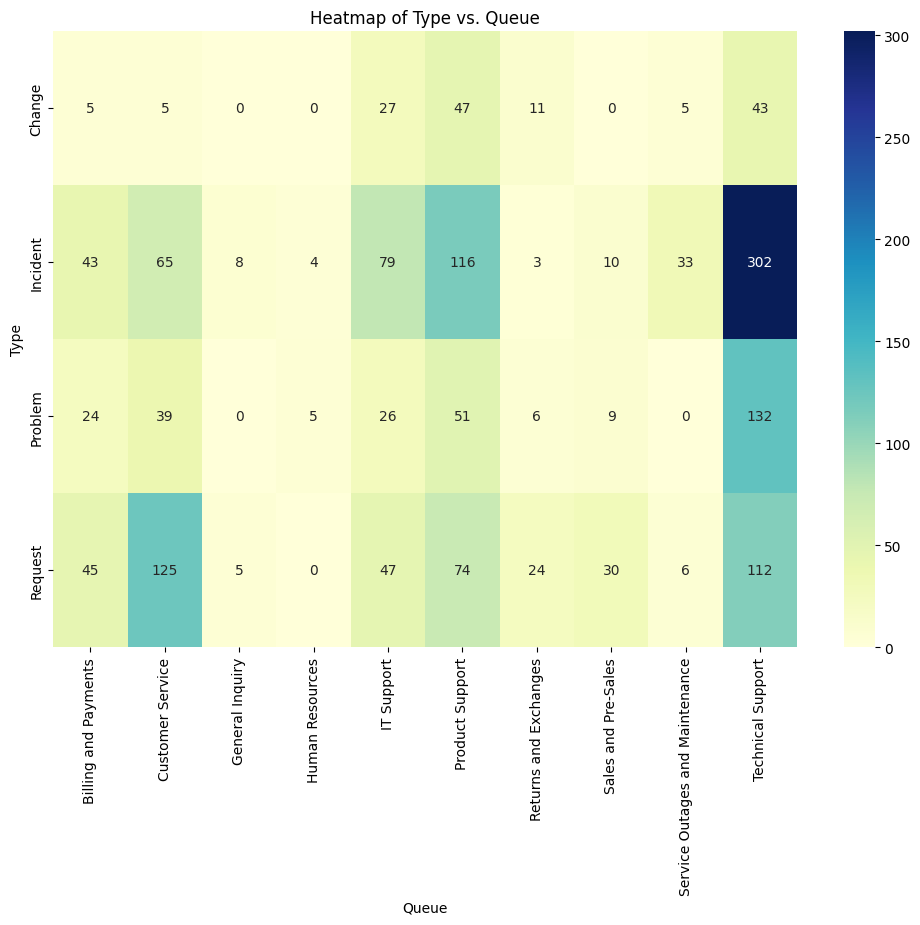

In [ ]:
# prompt: Relation between type and queue

# Assuming 'type' and 'queue' are columns in your DataFrame 'df'
type_queue_counts = df.groupby(['type', 'queue']).size().unstack(fill_value=0)

plt.figure(figsize=(12, 8))
sns.heatmap(type_queue_counts, annot=True, fmt="d", cmap="YlGnBu")
plt.title('Heatmap of Type vs. Queue')
plt.xlabel('Queue')
plt.ylabel('Type')
plt.show()

In [ ]:
# prompt: Check for missing values count in columns like subject, body, and answer.

# Check for missing values in 'subject', 'body', and 'answer' columns
missing_subject = df['subject'].isnull().sum()
missing_body = df['body'].isnull().sum()
missing_answer = df['answer'].isnull().sum()

print(f"Missing values in 'subject': {missing_subject}")
print(f"Missing values in 'body': {missing_body}")
print(f"Missing values in 'answer': {missing_answer}")

Missing values in 'subject': 1
Missing values in 'body': 1
Missing values in 'answer': 0


In [ ]:
df[['subject', 'body']].head()

,subject,body
0,Urgent: Critical impact on enterprise network ...,"Dear Customer Support Team, We are experiencin..."
1,Intermittent Cursor Freezing Issue on Dell XPS,"Dear Customer Support,<br><br>I hope this mess..."
2,Dringend: Unterstützung für die Datenwiederher...,"Hallo, wir haben severe Datenverluste in MySQL..."
3,Anfrage zu den MacBook Air M1 Funktionen,"Sehr geehrtes Kundenserviceteam,\n\nich hoffe,..."
4,Solicitação de Assistência com Erro de Instala...,"Caro Suporte ao Cliente,\n\nEstou enfrentando ..."


## Key Insights

### 1) Values of subject, body, answer columns are all unique
### 2) High Priority to technical support queue - 403
### 3) high Priority to IT Services Business Type - 432
### 4) Maximum Request in Customer Services queue - 125
### 5) Maximum Problem in Technical support queue - 132
### 6) Maximum Incident in Technical Support queue - 302
### 7) Maximum Change in Product support queu - 47